## View the Data

In [1]:
import pandas as pd

calendar = pd.read_csv('./data/calendar_summary.csv')
'''
listing_id, date, available, price
'''
listings = pd.read_csv('./data/listings.csv')
'''
id, name, host_id, host_name, neighbourhood_group,
neighbourhood, latitude, longitude, room_type, price,
minimum_nights, number_of_reviews, last_review,
reviews_per_month, calculated_host_listings_count,
availability_365
'''
listings_summ = pd.read_csv('./data/listings_summary.csv')
'''
A lot
'''
neighborhood = pd.read_csv('./data/neighbourhoods.csv')
'''
neighbourhood_group, neighbourhood
'''
reviews = pd.read_csv('./data/reviews.csv')
'''
listing_id, date
'''
reviews_summ = pd.read_csv('./data/reviews_summary.csv')
'''
listing_id, id, date, reviewer_id, reviewer_name, comments
'''

'\nlisting_id, id, date, reviewer_id, reviewer_name, comments\n'

In [2]:
listings_summ.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [3]:
# pip install pandas_profiling

In [4]:
# import pandas_profiling

# profile = pandas_profiling.ProfileReport(listings_summ)
# display(profile)

## Listings Summary Cleaning

In [5]:
df = listings_summ

In [6]:
df.shape

(22552, 96)

In [7]:
pd.options.display.max_rows = 100
df.isnull().sum()

id                                      0
listing_url                             0
scrape_id                               0
last_scraped                            0
name                                   59
summary                               963
space                                8532
description                           203
experiences_offered                     0
neighborhood_overview               11012
notes                               15337
transit                              9516
access                              11715
interaction                         12146
house_rules                         11103
thumbnail_url                       22552
medium_url                          22552
picture_url                             0
xl_picture_url                      22552
host_id                                 0
host_url                                0
host_name                              26
host_since                             26
host_location                     

In [8]:
df = df.drop(['access', 'availability_60', 'availability_90', 'cleaning_fee', 'country', 'country_code', 'experiences_offered', 'first_review', 
'has_availability', 'host_about', 'host_acceptance_rate', 'host_name', 'host_neighbourhood', 'host_response_rate', 'host_response_time', 
'host_total_listings_count', 'house_rules', 'interaction', 'is_business_travel_ready', 'jurisdiction_names', 'last_review', 
'last_scraped', 'license', 'medium_url', 'monthly_price', 'name', 'neighborhood_overview', 'notes', 'review_scores_accuracy', 
'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 
'review_scores_rating', 'review_scores_value', 'reviews_per_month', 'scrape_id', 'security_deposit', 'space', 'square_feet', 
'transit', 'weekly_price', 'thumbnail_url', 'xl_picture_url'], axis = 1)
df.head()

,id,listing_url,summary,description,picture_url,host_id,host_url,host_since,host_location,host_is_superhost,...,availability_30,availability_365,calendar_last_scraped,number_of_reviews,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,2015,https://www.airbnb.com/rooms/2015,Great location! 30 of 75 sq meters. This wood...,Great location! 30 of 75 sq meters. This wood...,https://a0.muscache.com/im/pictures/260fd609-7...,2217,https://www.airbnb.com/users/show/2217,2008-08-18,"Key Biscayne, Florida, United States",t,...,0,141,2018-11-07,118,t,f,strict_14_with_grace_period,f,f,4
1,2695,https://www.airbnb.com/rooms/2695,NaN,In the summertime we are spending most of our ...,https://a0.muscache.com/im/pictures/97d4f6e8-1...,2986,https://www.airbnb.com/users/show/2986,2008-09-16,"Berlin, Berlin, Germany",f,...,0,0,2018-11-07,6,t,f,flexible,f,f,1
2,3176,https://www.airbnb.com/rooms/3176,This beautiful first floor apartment is situa...,This beautiful first floor apartment is situa...,https://a0.muscache.com/im/pictures/243355/84a...,3718,https://www.airbnb.com/users/show/3718,2008-10-19,"Coledale, New South Wales, Australia",f,...,0,220,2018-11-07,143,t,t,strict_14_with_grace_period,f,f,1
3,3309,https://www.airbnb.com/rooms/3309,First of all: I prefer short-notice bookings. ...,First of all: I prefer short-notice bookings. ...,https://a0.muscache.com/im/pictures/29054294/b...,4108,https://www.airbnb.com/users/show/4108,2008-11-07,"Berlin, Berlin, Germany",f,...,0,297,2018-11-07,25,t,f,strict_14_with_grace_period,f,f,1
4,7071,https://www.airbnb.com/rooms/7071,Cozy and large room in the beautiful district ...,Cozy and large room in the beautiful district ...,https://a0.muscache.com/im/pictures/21278/32a1...,17391,https://www.airbnb.com/users/show/17391,2009-05-16,"Berlin, Berlin, Germany",t,...,15,26,2018-11-07,197,t,f,moderate,f,f,1


In [9]:
df.columns

Index(['id', 'listing_url', 'summary', 'description', 'picture_url', 'host_id',
       'host_url', 'host_since', 'host_location', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_lis

In [10]:
df['price'] = df['price'].apply(lambda x: x.strip('$'))
df['price'] = df['price'].apply(lambda x: x.strip('.00'))

In [11]:
df['price'] = df['price'].str.replace(',', '')

In [12]:
df['price'] = pd.to_numeric(df['price'])

In [13]:
df.isnull().sum()

id                                     0
listing_url                            0
summary                              963
description                          203
picture_url                            0
host_id                                0
host_url                               0
host_since                            26
host_location                        116
host_is_superhost                     26
host_thumbnail_url                    26
host_picture_url                      26
host_listings_count                   26
host_verifications                     0
host_has_profile_pic                  26
host_identity_verified                26
street                                 0
neighbourhood                       1131
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
city                                   5
state                                 84
zipcode                              656
market                                63
smart_location  

In [14]:
df = df.fillna(method = 'ffill')

## Isolate Most Important Features

In [15]:
import category_encoders as ce
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def wrangle(X):
    X = X.copy()

    return X

# Read data
trainval = df

# Split into train & validation sets
# All rows for a given tube_assembly_id should go in either train or validation
train_rentals, val_rentals = train_test_split(trainval, random_state=42)

# Wrangle train, validation, and test sets
train = wrangle(train_rentals)
val = wrangle(val_rentals)

# Arrange X matrix and y vector (log-transformed)
target = 'price'
X_train = train.drop(columns=target)
X_val = val.drop(columns=target)
y_train = train[target]
y_val = val[target]
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [16]:
# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit
pipeline.fit(X_train, y_train_log)

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

Validation Error 1.0845584358379068


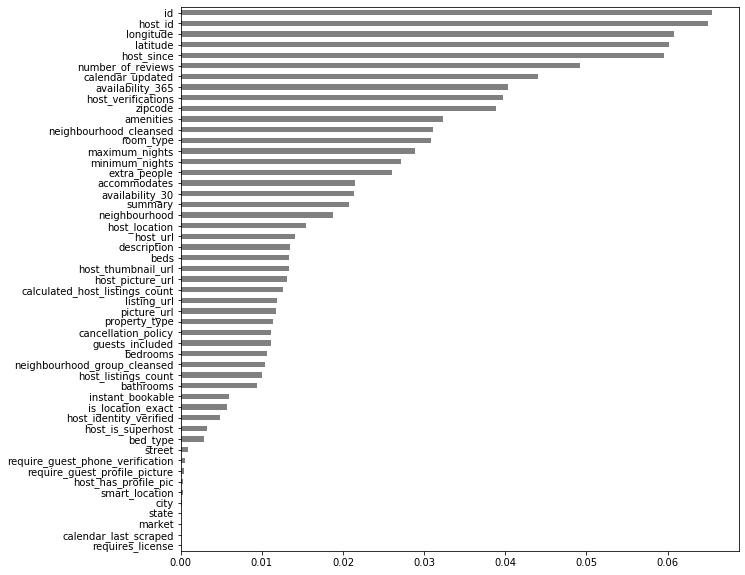

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)
importances.sort_values().plot.barh(color='grey');

In [18]:
df['amenities'][5]

'{TV,"Cable TV",Internet,Wifi,Kitchen,"Paid parking off premises",Elevator,"Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector",Essentials,Hangers,"Hair dryer",Iron,Bathtub,"High chair","Children’s books and toys","Babysitter recommendations",Crib,"Pack ’n Play/travel crib","Room-darkening shades","Children’s dinnerware","Hot water","Bed linens",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Oven,Stove,"Luggage dropoff allowed",Other}'

In [19]:
df['property_type'].unique()

array(['Guesthouse', 'Apartment', 'Condominium', 'Loft', 'House',
       'Serviced apartment', 'Townhouse', 'Boutique hotel',
       'Bed and breakfast', 'Bungalow', 'Boat', 'Guest suite', 'Other',
       'Island', 'Hostel', 'Train', 'Camper/RV', 'Houseboat', 'Cabin',
       'Cottage', 'Tiny house', 'Chalet', 'Castle', 'Villa', 'Aparthotel',
       'Hotel', 'Tipi', 'Resort', 'In-law', 'Cave', 'Barn',
       'Pension (South Korea)', 'Casa particular (Cuba)'], dtype=object)

## "Description" Column

In [20]:
pd.set_option('display.max_colwidth', 100)
df['description'].sample(20)

4085     Right in the middle of the up and coming 'Schillerkiez' in Neukölln. The apartment is a treasure...
18210    Cosy and well-equipped apartment in Berlin Prenzlauer Berg. Very nice, calm and clean area. Clos...
2602     Cute flat in popular Kreuzberg, close to public transport and bicicle-rents for max 5 People. 2 ...
11196    Berlin's best address! In the heart of old Mitte, steps away from the most attractive restaurant...
15956    You're renting the whole apartement while I am in my holidays. The apartment is located at the F...
10714    The flat is right in the middle of one of the nicest neighborhoods within Berlin.  There are a l...
7468     Hello! It is a nice place near Charlottenburg castle in one of the best districts of Berlin. It ...
13292    Hello dear Guest, a cozy bedroom is available in my apartment near Kuhdamm in Berlin Charlottenb...
2512     The small apartment is located in an ideal location, the tram is direct infront of the house and...
9218     Meine Unte

In [24]:
english = df[df["description"].str.contains("kitchen")]
english.shape

# kitchen: 9620 rows

(9620, 52)

In [25]:
english.head()

,id,listing_url,summary,description,picture_url,host_id,host_url,host_since,host_location,host_is_superhost,...,availability_30,availability_365,calendar_last_scraped,number_of_reviews,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,2015,https://www.airbnb.com/rooms/2015,"Great location! 30 of 75 sq meters. This wood floored/high ceiling typical Berlin ""Altbau"" sect...","Great location! 30 of 75 sq meters. This wood floored/high ceiling typical Berlin ""Altbau"" sect...",https://a0.muscache.com/im/pictures/260fd609-710a-4304-82ab-abd7498efd62.jpg?aki_policy=large,2217,https://www.airbnb.com/users/show/2217,2008-08-18,"Key Biscayne, Florida, United States",t,...,0,141,2018-11-07,118,t,f,strict_14_with_grace_period,f,f,4
2,3176,https://www.airbnb.com/rooms/3176,This beautiful first floor apartment is situated at Kollwitzplatz. Its ideal for 2 but can com...,This beautiful first floor apartment is situated at Kollwitzplatz. Its ideal for 2 but can com...,https://a0.muscache.com/im/pictures/243355/84afcff6_original.jpg?aki_policy=large,3718,https://www.airbnb.com/users/show/3718,2008-10-19,"Coledale, New South Wales, Australia",f,...,0,220,2018-11-07,143,t,t,strict_14_with_grace_period,f,f,1
5,9991,https://www.airbnb.com/rooms/9991,4 bedroom with very large windows and outstanding views of Mitte is great for families or groups...,4 bedroom with very large windows and outstanding views of Mitte is great for families or groups...,https://a0.muscache.com/im/pictures/42799131/59c88015_original.jpg?aki_policy=large,33852,https://www.airbnb.com/users/show/33852,2009-08-25,"Berlin, Berlin, Germany",f,...,0,137,2018-11-07,6,t,f,strict_14_with_grace_period,f,f,1
6,14325,https://www.airbnb.com/rooms/14325,The apartment is located on the upper second floor in a typical Berlin-style building from the t...,The apartment is located on the upper second floor in a typical Berlin-style building from the t...,https://a0.muscache.com/im/pictures/508703/24988a6f_original.jpg?aki_policy=large,55531,https://www.airbnb.com/users/show/55531,2009-11-18,"Berlin, Berlin, Germany",f,...,0,129,2018-11-07,23,t,f,strict_14_with_grace_period,f,f,3
7,16401,https://www.airbnb.com/rooms/16401,The apartment is located on the upper second floor in a typical Berlin-style building from the t...,Hello future guests! We want to rent our cute and truly unique apartment in the heart of Berlin ...,https://a0.muscache.com/im/pictures/4753854/99c206f4_original.jpg?aki_policy=large,59666,https://www.airbnb.com/users/show/59666,2009-12-03,"Berlin, Berlin, Germany",f,...,30,365,2018-11-07,0,t,f,strict_14_with_grace_period,f,f,1


In [26]:
# Classics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Base
from collections import Counter
import re
import os

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

# Vector Representations
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [27]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

english['lemmas'] = english['description'].apply(get_lemmas)

C:\Users\anika\Anaconda3\envs\DSML\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [28]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

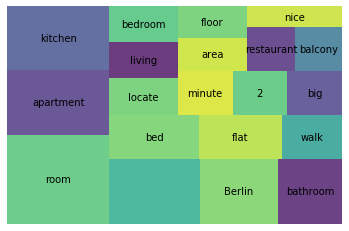

In [29]:
wc = count(english['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [35]:
english.sort_values(by = 'price', ascending = 'False')

,id,listing_url,summary,description,picture_url,host_id,host_url,host_since,host_location,host_is_superhost,...,availability_365,calendar_last_scraped,number_of_reviews,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,lemmas
16615,22280831,https://www.airbnb.com/rooms/22280831,A beautiful sunny spacious 3 room apartment with a separate kitchen in the very center of Berlin...,A beautiful sunny spacious 3 room apartment with a separate kitchen in the very center of Berlin...,https://a0.muscache.com/im/pictures/c7cc9066-e857-4d2e-b151-a95f1a72e8af.jpg?aki_policy=large,42968102,https://www.airbnb.com/users/show/42968102,2015-08-31,"Berlin, Berlin, Germany",f,...,0,2018-11-07,2,t,t,flexible,f,f,1,"[beautiful, sunny, spacious, 3, room, apartment, separate, kitchen, center, Berlin, private, gar..."
10437,15754848,https://www.airbnb.com/rooms/15754848,"Bright, spacious apartment in great neighborhood! Close to tube and bus stations. I will be tra...","Bright, spacious apartment in great neighborhood! Close to tube and bus stations. I will be tra...",https://a0.muscache.com/im/pictures/3dc70938-23f6-4c16-af02-983aae90549f.jpg?aki_policy=large,39357802,https://www.airbnb.com/users/show/39357802,2015-07-23,"Berlin, Berlin, Germany",f,...,31,2018-11-07,3,t,f,flexible,f,f,2,"[bright, spacious, apartment, great, neighborhood, close, tube, bus, station, , travel, mid, Se..."
10485,15833288,https://www.airbnb.com/rooms/15833288,We are renting a room in our 100m2 loft apartment in Berlin's most popular area Neukölln. The ap...,We are renting a room in our 100m2 loft apartment in Berlin's most popular area Neukölln. The ap...,https://a0.muscache.com/im/pictures/c10faa52-1bde-428e-a806-5e2d5d821542.jpg?aki_policy=large,7870517,https://www.airbnb.com/users/show/7870517,2013-08-01,"Berlin, Berlin, Germany",f,...,241,2018-11-07,1,t,f,moderate,f,f,1,"[rent, room, 100m2, loft, apartment, Berlin, popular, area, Neukölln, apartment, locate, floor, ..."
16242,21992304,https://www.airbnb.com/rooms/21992304,"Hi Guys, A warm welcome to all guests visiting this beautiful city of Berlin. We offer our apart...","Hi Guys, A warm welcome to all guests visiting this beautiful city of Berlin. We offer our apart...",https://a0.muscache.com/im/pictures/906563c7-bf6c-4177-9403-bb08cf5e4400.jpg?aki_policy=large,36679879,https://www.airbnb.com/users/show/36679879,2015-06-25,"Berlin, Berlin, Germany",f,...,0,2018-11-07,0,t,f,strict_14_with_grace_period,f,f,1,"[hi, Guys, warm, welcome, guest, visit, beautiful, city, Berlin, offer, apartment, tourist, visi..."
2564,3883568,https://www.airbnb.com/rooms/3883568,"I rent out my two beautiful rooms (1 bedroom, 1 workroom) in Oranienstraße, you can´t get closer...","I rent out my two beautiful rooms (1 bedroom, 1 workroom) in Oranienstraße, you can´t get closer...",https://a0.muscache.com/im/pictures/48865852/43b50d21_original.jpg?aki_policy=large,20080657,https://www.airbnb.com/users/show/20080657,2014-08-15,"Berlin, Berlin, Germany",f,...,0,2018-11-07,1,t,f,moderate,f,f,1,"[rent, beautiful, room, 1, bedroom, 1, workroom, Oranienstraße, can´t, close, city, center, room..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683,8117216,https://www.airbnb.com/rooms/8117216,Beautiful sunny penthouse in best area! The penthouse is 180 sqm and has a large living room wit...,Beautiful sunny penthouse in best area! The penthouse is 180 sqm and has a large living room wit...,https://a0.muscache.com/im/pictures/103425137/48b5b5e9_original.jpg?aki_policy=large,2036581,https://www.airbnb.com/users/show/2036581,2012-03-30,"Berlin, Berlin, Germany",f,...,364,2018-11-07,40,t,f,strict_14_with_grace_period,f,f,1,"[beautiful, sunny, penthouse, good, area, penthouse, 180, sqm, large, living, room, open, kitche..."
15466,21286310,https://www.airbnb.com/rooms/21286310,"Stay in the heart of Berlin – Great locati

## Reviews

In [ ]:
# reviews_summ.head()

In [ ]:
# reviews_summ.dtypes

In [ ]:
# This isn't going to work due to multiple foreign languages

# def get_lemmas(text):

#     lemmas = []
    
#     doc = nlp(text)
    
#     for token in doc: 
#         if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
#             lemmas.append(token.lemma_)
    
#     return lemmas

# reviews_summ['lemmas'] = reviews_summ['comments'].apply(get_lemmas)